1_analysis_rent.csv


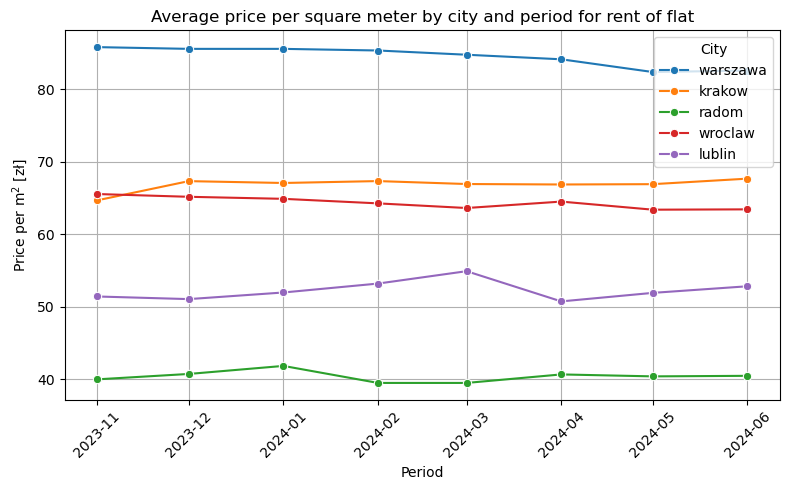

2_analysis_purchase.csv


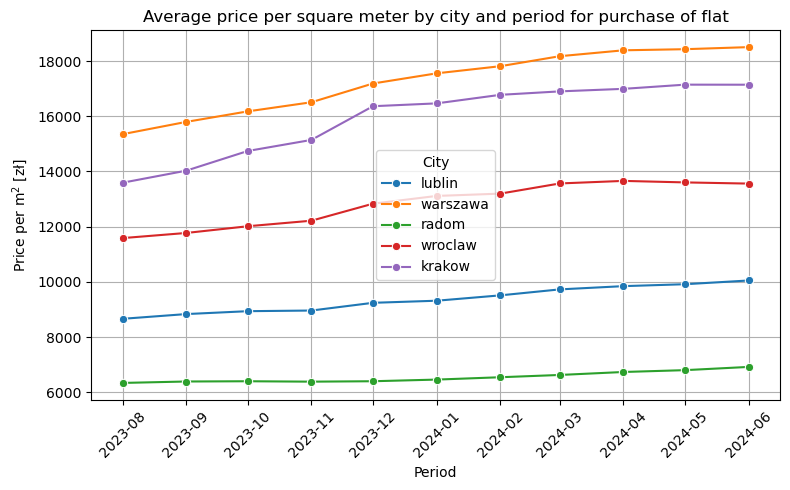

In [52]:
from my import all_import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "./../data/processed/"
files = all_import(path)

for file in files[0]:
    print(file)
    data = pd.read_csv(path + file)
    # Price per sq meter
    data["price/sq_m"] = data["price"] / data["squareMeters"]
    columns_to_keep = ["city", "Period", "price/sq_m"]
    data = data[columns_to_keep]

    # Count average for each period for each city
    avg_table = data.groupby(["city", "Period"])["price/sq_m"].mean().reset_index()
    avg_table["Period"] = pd.to_datetime(avg_table["Period"], format="%m_%y")
    avg_table = avg_table.sort_values("Period")

    # Plot
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=avg_table, x="Period", y="price/sq_m", hue="city", marker="o")
    plt.title(
        "Average price per square meter by city and period for "
        + file[11:-4]
        + " of flat"
    )
    plt.ylabel("Price per m$^2$ [zł]")
    plt.xlabel("Period")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title="City")
    plt.savefig("./../plots/"+file[11:-4]+"_average_price_vs_period")
    plt.show()
